# AirBnb in Bordeaux - "La Cité du Vin"

## Introduction

#### Context of AirBnb in Bordeaux

Airbnb is a company that offers a digital platform dedicated to offering accommodation to individuals and tourists (vacation rentals) through which hosts can advertise and rent their properties to their guests. Hosts and guests can rate each other, as a reference for future users. It was born in 2007 and now has more than 5 million hosts who have shared their accommodations with more than 1.5 billion people in almost every country in the world. Every day, hosts offer unique stays and experiences that allow travelers to experience other communities in a more authentic way. 

Located in the southwest of France, Bordeaux has been known since the 18th century for its vineyards and the quality of its wines, making it one of the oldest and most prestigious wine centers in the world. This attracts a lot of tourism to Bordeaux, since, after Paris, it is the town in France that houses the most monuments. Its vine-shaped architecture is unique in the world. It has been listed on UNESCO World Heritage since 2007. 



#### Goals 

In this notebook, we are going to predict the price of AirBnb accomodations in Bordeaux.

## Basic Questions

- Which are the neighborhoods with the most tourist rentals?
- Which are the most offered rooms?
- What is the relationship between room type and prices?
- Which are the rooms with the most availability by region?
- Which are the most touristic areas according to visits?

## Contents
1. Importing packages
2. Preliminary examination of the data
3. Data cleaning
4. Exploratory data analysis
5. Conclusion

## Import the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
bordeaux = pd.read_csv("/Users/LULA/Desktop/listings_bordeaux.csv")
bordeaux

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,222887,"Bordeaux Terrace - amazing view, air-con, elev...",1156398,Suzanna,Bordeaux,Bordeaux Sud,44.836102,-0.566395,Entire home/apt,203.0,3,85,2024-01-22,0.57,4,265,21,3306300031048
1,247452,"Cosy apartment ,barbecue, pool",959918,Krista,Saint-Mdard-en-Jalles,Saint-Mdard-en-Jalles,44.858900,-0.727350,Entire home/apt,95.0,2,66,2024-03-01,0.45,1,151,11,NaN
2,317273,"Bordeaux City Gardens - large 1 bd, park adjacent",1156398,Suzanna,Bordeaux,Chartrons - Grand Parc - Jardin Public,44.847801,-0.581046,Entire home/apt,171.0,3,56,2024-02-21,0.48,4,229,15,33063001366CB
3,317658,"Key to Bordeaux - fairytale view, 2 bd + elevator",1156398,Suzanna,Bordeaux,Centre ville (Bordeaux),44.838799,-0.568870,Entire home/apt,219.0,3,141,2024-03-14,0.96,4,200,33,33063001225CF
4,333031,STUDIO BORDEAUX TRIANGLE D OR ***** Climatisé,1697156,Antony,Bordeaux,Centre ville (Bordeaux),44.842560,-0.577940,Entire home/apt,82.0,1,491,2024-03-08,3.37,2,326,54,3306300055979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12027,1117248563909719800,Appartement cosy - Bordeaux,8898276,Manon,Bordeaux,Caudran,44.838600,-0.603322,Private room,30.0,1,0,NaN,NaN,1,266,0,NaN
12028,1117417546121838124,Chambre avec salle d'eau privative - aéroport,506458522,Coraline,Merignac,Beaudsert,44.835196,-0.690823,Private room,60.0,1,0,NaN,NaN,2,176,0,NaN
12029,1117418921368991656,Chambre avec salle d'eau privative - zone aéro...,506458522,Coraline,Merignac,Beaudsert,44.835196,-0.690823,Private room,60.0,1,0,NaN,NaN,2,270,0,NaN
12030,1117487056498788768,Maison cosy entre ville et plage,25785441,Noelle,Saint-Mdard-en-Jalles,Saint-Mdard-en-Jalles,44.901153,-0.734088,Entire home/apt,99.0,7,0,NaN,NaN,2,231,0,NaN


## Preliminary examination of the data

We will do a preliminary analysis of the database to view them

In [5]:
# Print the first 5 rows
bordeaux.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,222887,"Bordeaux Terrace - amazing view, air-con, elev...",1156398,Suzanna,Bordeaux,Bordeaux Sud,44.836102,-0.566395,Entire home/apt,203.0,3,85,2024-01-22,0.57,4,265,21,3306300031048
1,247452,"Cosy apartment ,barbecue, pool",959918,Krista,Saint-Mdard-en-Jalles,Saint-Mdard-en-Jalles,44.858900,-0.727350,Entire home/apt,95.0,2,66,2024-03-01,0.45,1,151,11,NaN
2,317273,"Bordeaux City Gardens - large 1 bd, park adjacent",1156398,Suzanna,Bordeaux,Chartrons - Grand Parc - Jardin Public,44.847801,-0.581046,Entire home/apt,171.0,3,56,2024-02-21,0.48,4,229,15,33063001366CB
3,317658,"Key to Bordeaux - fairytale view, 2 bd + elevator",1156398,Suzanna,Bordeaux,Centre ville (Bordeaux),44.838799,-0.568870,Entire home/apt,219.0,3,141,2024-03-14,0.96,4,200,33,33063001225CF
4,333031,STUDIO BORDEAUX TRIANGLE D OR ***** Climatisé,1697156,Antony,Bordeaux,Centre ville (Bordeaux),44.842560,-0.577940,Entire home/apt,82.0,1,491,2024-03-08,3.37,2,326,54,3306300055979


In [6]:
# Print The Dataset shape
bordeaux.shape

(12032, 18)

We can observe from the dataset,there are 12032 rows and 18 columns.

In [7]:
# Showing the updated columns
bordeaux.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [8]:
# Checking the data types 
bordeaux.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [9]:
# General info of the dataset
bordeaux.info

<bound method DataFrame.info of                         id                                               name  \
0                   222887  Bordeaux Terrace - amazing view, air-con, elev...   
1                   247452                     Cosy apartment ,barbecue, pool   
2                   317273  Bordeaux City Gardens - large 1 bd, park adjacent   
3                   317658  Key to Bordeaux - fairytale view, 2 bd + elevator   
4                   333031      STUDIO BORDEAUX TRIANGLE D OR ***** Climatisé   
...                    ...                                                ...   
12027  1117248563909719800                        Appartement cosy - Bordeaux   
12028  1117417546121838124      Chambre avec salle d'eau privative - aéroport   
12029  1117418921368991656  Chambre avec salle d'eau privative - zone aéro...   
12030  1117487056498788768                   Maison cosy entre ville et plage   
12031  1117521211068182009                               Au coeur de Bordeaux

In [10]:
# Checking NaN values in each column.
bordeaux.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             4085
minimum_nights                       0
number_of_reviews                    0
last_review                       2197
reviews_per_month                 2197
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           7467
dtype: int64

## Data cleaning

From a first analysis we can draw some first conclusions:
- We will check if there are any rows that are empty or duplicates and delete them
- There are a total of 4085 unpriced properties!!! Which represents 34% of the total. We are going to fill these values ​​with the average, and we are not going to eliminate them, because they can be significant in the analysis.
- License: There are a total of 7467 properties that have a Nan value, which is equivalent to 62%. Which implies that the field has not been filled out and may be due to not having a license. We will assign them the value zero and leave it for future analysis, since it occupies a very large percentage of the dataset.
- In the reviews_by_month column there is null data, but we will not eliminate it, since it is possible that these properties have not had any searches, so we will assign it a value of 0 so as not to exclude it.
- We will remove the columns: 'id', 'name', 'host_name', 'last_review'and 'calculated_host_listings_count', since they are not relevant for the analysis.
- There are a large number of cities that have few properties and are generally outside the city, so we are going to replace their name with the name 'Outside city'
- The minium_nights column has values that are greater than a minimum number of reserve days in a year. So I'm going to delete these values.



#### 1. Checking the rows, to see if there are empty or duplicate rows and delete them:

In [11]:
bordeaux.dropna(how="all")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,222887,"Bordeaux Terrace - amazing view, air-con, elev...",1156398,Suzanna,Bordeaux,Bordeaux Sud,44.836102,-0.566395,Entire home/apt,203.0,3,85,2024-01-22,0.57,4,265,21,3306300031048
1,247452,"Cosy apartment ,barbecue, pool",959918,Krista,Saint-Mdard-en-Jalles,Saint-Mdard-en-Jalles,44.858900,-0.727350,Entire home/apt,95.0,2,66,2024-03-01,0.45,1,151,11,NaN
2,317273,"Bordeaux City Gardens - large 1 bd, park adjacent",1156398,Suzanna,Bordeaux,Chartrons - Grand Parc - Jardin Public,44.847801,-0.581046,Entire home/apt,171.0,3,56,2024-02-21,0.48,4,229,15,33063001366CB
3,317658,"Key to Bordeaux - fairytale view, 2 bd + elevator",1156398,Suzanna,Bordeaux,Centre ville (Bordeaux),44.838799,-0.568870,Entire home/apt,219.0,3,141,2024-03-14,0.96,4,200,33,33063001225CF
4,333031,STUDIO BORDEAUX TRIANGLE D OR ***** Climatisé,1697156,Antony,Bordeaux,Centre ville (Bordeaux),44.842560,-0.577940,Entire home/apt,82.0,1,491,2024-03-08,3.37,2,326,54,3306300055979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12027,1117248563909719800,Appartement cosy - Bordeaux,8898276,Manon,Bordeaux,Caudran,44.838600,-0.603322,Private room,30.0,1,0,NaN,NaN,1,266,0,NaN
12028,1117417546121838124,Chambre avec salle d'eau privative - aéroport,506458522,Coraline,Merignac,Beaudsert,44.835196,-0.690823,Private room,60.0,1,0,NaN,NaN,2,176,0,NaN
12029,1117418921368991656,Chambre avec salle d'eau privative - zone aéro...,506458522,Coraline,Merignac,Beaudsert,44.835196,-0.690823,Private room,60.0,1,0,NaN,NaN,2,270,0,NaN
12030,1117487056498788768,Maison cosy entre ville et plage,25785441,Noelle,Saint-Mdard-en-Jalles,Saint-Mdard-en-Jalles,44.901153,-0.734088,Entire home/apt,99.0,7,0,NaN,NaN,2,231,0,NaN


In [12]:
bordeaux.drop_duplicates()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,222887,"Bordeaux Terrace - amazing view, air-con, elev...",1156398,Suzanna,Bordeaux,Bordeaux Sud,44.836102,-0.566395,Entire home/apt,203.0,3,85,2024-01-22,0.57,4,265,21,3306300031048
1,247452,"Cosy apartment ,barbecue, pool",959918,Krista,Saint-Mdard-en-Jalles,Saint-Mdard-en-Jalles,44.858900,-0.727350,Entire home/apt,95.0,2,66,2024-03-01,0.45,1,151,11,NaN
2,317273,"Bordeaux City Gardens - large 1 bd, park adjacent",1156398,Suzanna,Bordeaux,Chartrons - Grand Parc - Jardin Public,44.847801,-0.581046,Entire home/apt,171.0,3,56,2024-02-21,0.48,4,229,15,33063001366CB
3,317658,"Key to Bordeaux - fairytale view, 2 bd + elevator",1156398,Suzanna,Bordeaux,Centre ville (Bordeaux),44.838799,-0.568870,Entire home/apt,219.0,3,141,2024-03-14,0.96,4,200,33,33063001225CF
4,333031,STUDIO BORDEAUX TRIANGLE D OR ***** Climatisé,1697156,Antony,Bordeaux,Centre ville (Bordeaux),44.842560,-0.577940,Entire home/apt,82.0,1,491,2024-03-08,3.37,2,326,54,3306300055979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12027,1117248563909719800,Appartement cosy - Bordeaux,8898276,Manon,Bordeaux,Caudran,44.838600,-0.603322,Private room,30.0,1,0,NaN,NaN,1,266,0,NaN
12028,1117417546121838124,Chambre avec salle d'eau privative - aéroport,506458522,Coraline,Merignac,Beaudsert,44.835196,-0.690823,Private room,60.0,1,0,NaN,NaN,2,176,0,NaN
12029,1117418921368991656,Chambre avec salle d'eau privative - zone aéro...,506458522,Coraline,Merignac,Beaudsert,44.835196,-0.690823,Private room,60.0,1,0,NaN,NaN,2,270,0,NaN
12030,1117487056498788768,Maison cosy entre ville et plage,25785441,Noelle,Saint-Mdard-en-Jalles,Saint-Mdard-en-Jalles,44.901153,-0.734088,Entire home/apt,99.0,7,0,NaN,NaN,2,231,0,NaN


There are not empty or duplicate rows

#### 2. Checking the column "price"

In [13]:
# Checking NaN values on column price
bordeaux["price"].value_counts(dropna = False)

price
NaN       4085
50.0       234
60.0       231
80.0       205
90.0       199
          ... 
337.0        1
1386.0       1
570.0        1
268.0        1
386.0        1
Name: count, Length: 422, dtype: int64

In [14]:
# Imputing Price with mean.
mean_price = bordeaux['price'].mean()
bordeaux['price'].fillna(mean_price, inplace=True)
bordeaux

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,222887,"Bordeaux Terrace - amazing view, air-con, elev...",1156398,Suzanna,Bordeaux,Bordeaux Sud,44.836102,-0.566395,Entire home/apt,203.0,3,85,2024-01-22,0.57,4,265,21,3306300031048
1,247452,"Cosy apartment ,barbecue, pool",959918,Krista,Saint-Mdard-en-Jalles,Saint-Mdard-en-Jalles,44.858900,-0.727350,Entire home/apt,95.0,2,66,2024-03-01,0.45,1,151,11,NaN
2,317273,"Bordeaux City Gardens - large 1 bd, park adjacent",1156398,Suzanna,Bordeaux,Chartrons - Grand Parc - Jardin Public,44.847801,-0.581046,Entire home/apt,171.0,3,56,2024-02-21,0.48,4,229,15,33063001366CB
3,317658,"Key to Bordeaux - fairytale view, 2 bd + elevator",1156398,Suzanna,Bordeaux,Centre ville (Bordeaux),44.838799,-0.568870,Entire home/apt,219.0,3,141,2024-03-14,0.96,4,200,33,33063001225CF
4,333031,STUDIO BORDEAUX TRIANGLE D OR ***** Climatisé,1697156,Antony,Bordeaux,Centre ville (Bordeaux),44.842560,-0.577940,Entire home/apt,82.0,1,491,2024-03-08,3.37,2,326,54,3306300055979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12027,1117248563909719800,Appartement cosy - Bordeaux,8898276,Manon,Bordeaux,Caudran,44.838600,-0.603322,Private room,30.0,1,0,NaN,NaN,1,266,0,NaN
12028,1117417546121838124,Chambre avec salle d'eau privative - aéroport,506458522,Coraline,Merignac,Beaudsert,44.835196,-0.690823,Private room,60.0,1,0,NaN,NaN,2,176,0,NaN
12029,1117418921368991656,Chambre avec salle d'eau privative - zone aéro...,506458522,Coraline,Merignac,Beaudsert,44.835196,-0.690823,Private room,60.0,1,0,NaN,NaN,2,270,0,NaN
12030,1117487056498788768,Maison cosy entre ville et plage,25785441,Noelle,Saint-Mdard-en-Jalles,Saint-Mdard-en-Jalles,44.901153,-0.734088,Entire home/apt,99.0,7,0,NaN,NaN,2,231,0,NaN


In [15]:
# Checking the column price without NaN values
bordeaux["price"].value_counts

<bound method IndexOpsMixin.value_counts of 0        203.0
1         95.0
2        171.0
3        219.0
4         82.0
         ...  
12027     30.0
12028     60.0
12029     60.0
12030     99.0
12031    150.0
Name: price, Length: 12032, dtype: float64>

In [16]:
# Checking the column price without NaN values, in the total of columns
bordeaux.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2197
reviews_per_month                 2197
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           7467
dtype: int64

#### 3. Replacing the Nan values in "license" by 0

In [17]:
bordeaux["license"].fillna(0, inplace=True)

In [18]:
bordeaux["license"].value_counts(dropna = False)

license
0                                                         7467
Available with a mobility lease only ("bail mobilité")     337
Exempt - hotel-type listing                                 89
1234567890123                                                9
33063009350FC                                                6
                                                          ... 
3306300377786                                                1
33063005029A6                                                1
33063007409A6                                                1
330630055555C                                                1
33063011418B3                                                1
Name: count, Length: 3933, dtype: int64

In [19]:
# Checking the columns
bordeaux.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2197
reviews_per_month                 2197
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                              0
dtype: int64

#### 4. Replacing the Nan values in "reviews_per_month" by 0

In [20]:
bordeaux["reviews_per_month"].fillna(0, inplace=True)
bordeaux.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2197
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                              0
dtype: int64

#### 5. Removing the columns: 'id', 'name', 'host_name', 'last_review'and 'calculated_host_listings_count'

In [21]:
bordeaux.drop(columns=['id', 'name', 'host_name', 'last_review', 'calculated_host_listings_count'], inplace=True)

In [22]:
bordeaux.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

#### 6. Replacing cities by 'Outside city'

In [23]:
bordeaux['neighbourhood_group'].value_counts()

neighbourhood_group
Bordeaux                      6689
Merignac                       738
Talence                        601
Pessac                         599
Bgles                          501
Le Bouscat                     367
Villenave-d'Ornon              331
Cenon                          284
Saint-Mdard-en-Jalles          265
Bruges                         225
Gradignan                      184
Eysines                        176
Lormont                        172
Floirac                        168
Blanquefort                    111
Le Taillan-Mdoc                 91
Artigues-Prs-Bordeaux           78
Saint-Aubin-de-Mdoc             77
Ambars-et-Lagrave               73
Le Haillan                      58
Bouliac                         52
Carbon-Blanc                    50
Martignas-sur-Jalle             41
Bassens                         36
Parempuyre                      32
Saint-Louis-de-Montferrand      18
Ambs                            11
Saint-Vincent-de-Paul            4


In [24]:
bordeaux['neighbourhood_group'] = bordeaux['neighbourhood_group'].replace({"Saint-Vincent-de-Paul": "Outside_city", "Ambs": "Outside_city", "Saint-Louis-de-Montferrand": "Outside_city", "Parempuyre": "Outside_city", "Bassens": "Outside_city", "Martignas-sur-Jalle": "Outside_city", "Carbon-Blanc": "Outside_city", "Bouliac": "Outside_city", "Le Haillan": "Outside_city", "Ambars-et-Lagrave": "Outside_city", "Saint-Aubin-de-Mdoc": "Outside_city", "Artigues-Prs-Bordeaux": "Outside_city", "Le Taillan-Mdoc": "Outside_city", "Lormont": "Outside_city", "Gradignan": "Outside_city", "Bruges": "Outside_city", "Eysines": "Outside_city"})
bordeaux['neighbourhood_group']

0                     Bordeaux
1        Saint-Mdard-en-Jalles
2                     Bordeaux
3                     Bordeaux
4                     Bordeaux
                 ...          
12027                 Bordeaux
12028                 Merignac
12029                 Merignac
12030    Saint-Mdard-en-Jalles
12031                 Bordeaux
Name: neighbourhood_group, Length: 12032, dtype: object

In [25]:
bordeaux['neighbourhood_group'].value_counts()

neighbourhood_group
Bordeaux                 6689
Outside_city             1378
Merignac                  738
Talence                   601
Pessac                    599
Bgles                     501
Le Bouscat                367
Villenave-d'Ornon         331
Cenon                     284
Saint-Mdard-en-Jalles     265
Floirac                   168
Blanquefort               111
Name: count, dtype: int64

#### 7. Removing the values of the column "minimun_nights" higher than one year

In [26]:
# Checking the values of column 'minimum_nights'
bordeaux["minimum_nights"].unique()

array([  3,   2,   1,  30,   5,   7, 365, 120,   4,   6,  25,  20,  14,
        13,  90,  10,  15,  19,  16,  31, 250, 999, 800,   8, 400, 900,
        60, 366,  40, 199,  61, 180,  21,  28,  35, 110, 200,   9,  12,
        23, 300, 360,  45, 160,  80,  89, 450, 350,  55,  92, 355,  32],
      dtype=int64)

In [27]:
bordeaux["minimum_nights"].value_counts()

minimum_nights
2      3525
1      3415
3      1327
365    1228
4       569
5       524
7       501
30      314
6       226
90      103
14       55
10       50
15       35
8        20
20       19
28       17
31       11
13        9
180       8
60        8
25        6
9         6
45        6
12        5
999       5
21        5
120       4
200       3
16        3
23        2
89        2
300       1
80        1
450       1
350       1
360       1
55        1
92        1
355       1
160       1
250       1
110       1
35        1
61        1
199       1
40        1
366       1
19        1
900       1
400       1
800       1
32        1
Name: count, dtype: int64

In [28]:
# Remove outliers from 'minium_nights' 
bordeaux= bordeaux[bordeaux["minimum_nights"]<365]
bordeaux

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,license
0,1156398,Bordeaux,Bordeaux Sud,44.836102,-0.566395,Entire home/apt,203.0,3,85,0.57,265,21,3306300031048
1,959918,Saint-Mdard-en-Jalles,Saint-Mdard-en-Jalles,44.858900,-0.727350,Entire home/apt,95.0,2,66,0.45,151,11,0
2,1156398,Bordeaux,Chartrons - Grand Parc - Jardin Public,44.847801,-0.581046,Entire home/apt,171.0,3,56,0.48,229,15,33063001366CB
3,1156398,Bordeaux,Centre ville (Bordeaux),44.838799,-0.568870,Entire home/apt,219.0,3,141,0.96,200,33,33063001225CF
4,1697156,Bordeaux,Centre ville (Bordeaux),44.842560,-0.577940,Entire home/apt,82.0,1,491,3.37,326,54,3306300055979
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12027,8898276,Bordeaux,Caudran,44.838600,-0.603322,Private room,30.0,1,0,0.00,266,0,0
12028,506458522,Merignac,Beaudsert,44.835196,-0.690823,Private room,60.0,1,0,0.00,176,0,0
12029,506458522,Merignac,Beaudsert,44.835196,-0.690823,Private room,60.0,1,0,0.00,270,0,0
12030,25785441,Saint-Mdard-en-Jalles,Saint-Mdard-en-Jalles,44.901153,-0.734088,Entire home/apt,99.0,7,0,0.00,231,0,0


In [29]:
# Checking correct values in column
bordeaux["minimum_nights"].unique()

array([  3,   2,   1,  30,   5,   7, 120,   4,   6,  25,  20,  14,  13,
        90,  10,  15,  19,  16,  31, 250,   8,  60,  40, 199,  61, 180,
        21,  28,  35, 110, 200,   9,  12,  23, 300, 360,  45, 160,  80,
        89, 350,  55,  92, 355,  32], dtype=int64)

#### Resuming the dataset after the changes:

In [30]:
bordeaux.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,license
0,1156398,Bordeaux,Bordeaux Sud,44.836102,-0.566395,Entire home/apt,203.0,3,85,0.57,265,21,3306300031048
1,959918,Saint-Mdard-en-Jalles,Saint-Mdard-en-Jalles,44.858900,-0.727350,Entire home/apt,95.0,2,66,0.45,151,11,0
2,1156398,Bordeaux,Chartrons - Grand Parc - Jardin Public,44.847801,-0.581046,Entire home/apt,171.0,3,56,0.48,229,15,33063001366CB
3,1156398,Bordeaux,Centre ville (Bordeaux),44.838799,-0.568870,Entire home/apt,219.0,3,141,0.96,200,33,33063001225CF
4,1697156,Bordeaux,Centre ville (Bordeaux),44.842560,-0.577940,Entire home/apt,82.0,1,491,3.37,326,54,3306300055979


## Exploratory Data Analysis

#### Checking the Neighbourhood place

In [31]:
# Properties by neighbourhood place
bordeaux['neighbourhood_group'].unique()

array(['Bordeaux', 'Saint-Mdard-en-Jalles', 'Bgles', 'Talence',
       'Le Bouscat', 'Pessac', 'Cenon', 'Outside_city', 'Merignac',
       'Floirac', "Villenave-d'Ornon", 'Blanquefort'], dtype=object)

Text(0, 0.5, 'Count')

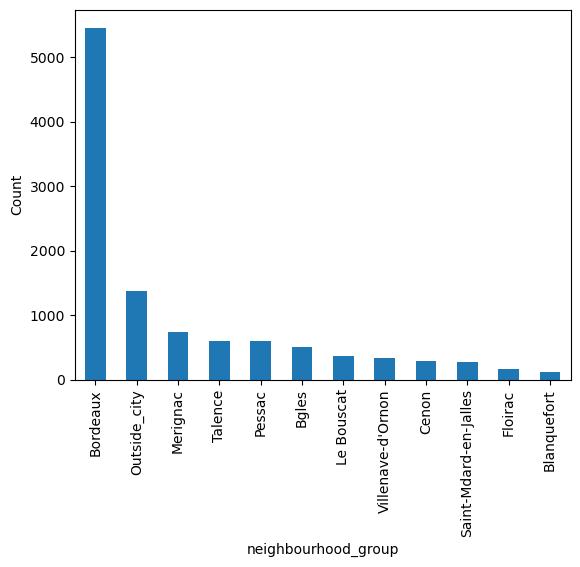

In [32]:
bordeaux.neighbourhood_group.value_counts().plot(kind="bar")
plt.xlabel("neighbourhood_group")
plt.ylabel("Count")


We can see here, that most of the properties are on Bordeaux centre, the turistic place and Merignac, near the airport. We can also see that there is a great tendency to have property choices outside the city, because Bordeaux is a place that attracts many tourists who want to visit wineries that are outside the center. In addition, there are many natural areas to visit, so it can also attract this type of tourism.

<Axes: xlabel='neighbourhood_group', ylabel='price'>

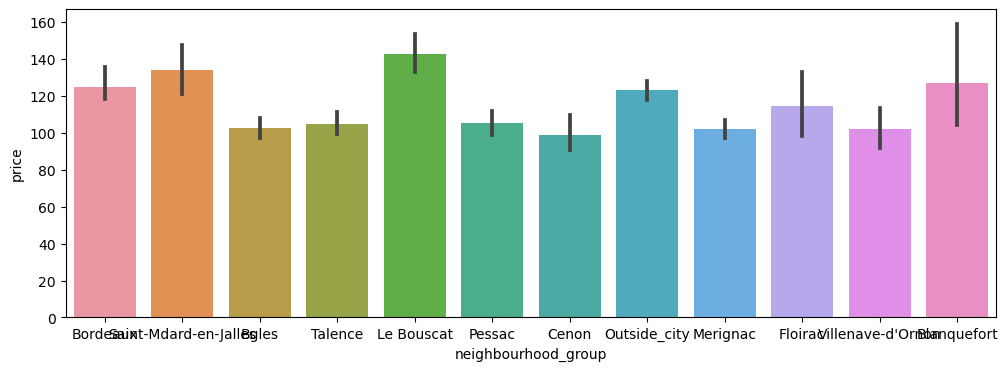

In [33]:
plt.figure(figsize=(12,4))
sns.barplot(data=bordeaux,x="neighbourhood_group",y="price")

We can observe the most high prices are in Le Bouscat.

#### Checking the types of rooms offered

In [132]:
# Different types of rooms offered
bordeaux['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

<Axes: xlabel='room_type', ylabel='count'>

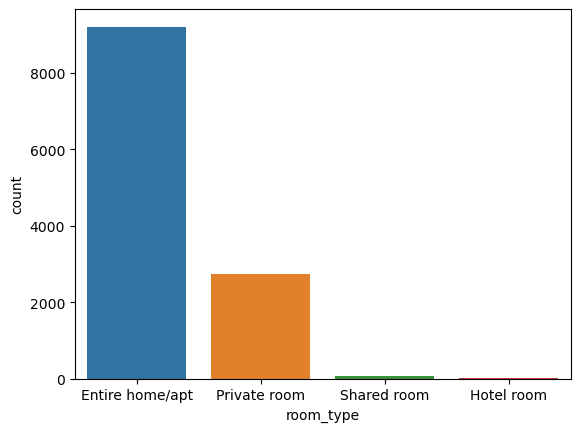

In [137]:
# Showing type of rooms
sns.countplot(x = 'room_type', data = bordeaux)

Most properties are for a complete house or apartment. Then there is a small part that is offered as a private room, and finally, a very small part that is a shared room or hotel. This is because the majority of tourists prefer to have privacy rather than sharing a room.

#### Checking the price by room and availability

<Axes: xlabel='room_type', ylabel='price'>

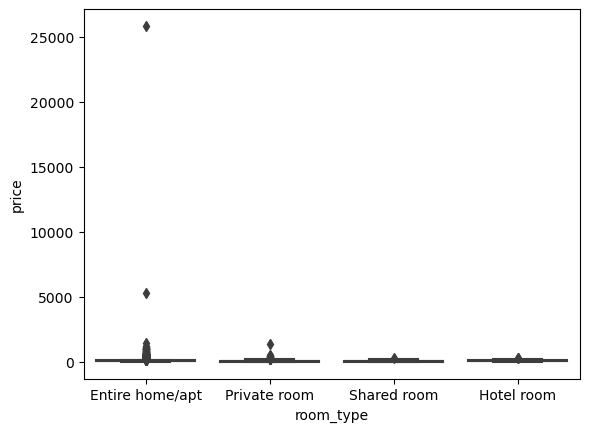

In [196]:
sns.boxplot(data=bordeaux, x="room_type", y="price",)

(0.0, 273.0)

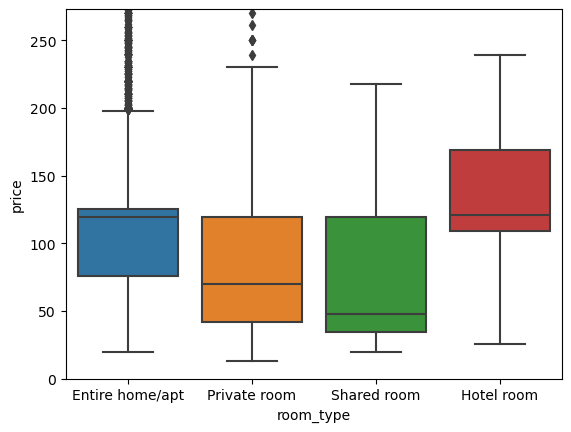

In [194]:
# Showing the result after limiting the price
sns.boxplot(data=bordeaux, x="room_type", y="price",)
plt.ylim(0, bordeaux['price'].quantile(0.95))

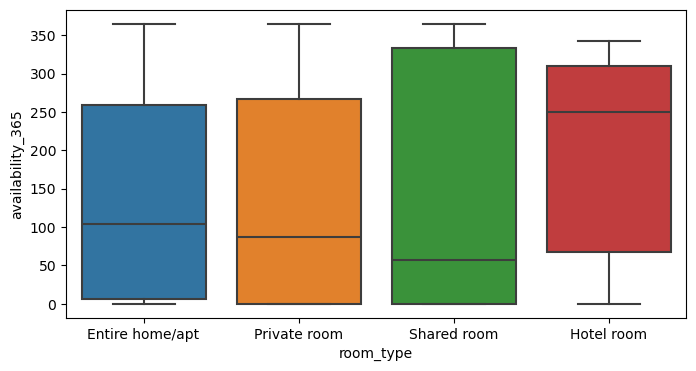

In [206]:
# Checking the availability by room
plt.figure(figsize=(8,4))
ax = sns.boxplot(data=bordeaux, x='room_type',y='availability_365')

#### Checking the availability of room by Neighbourhood_group

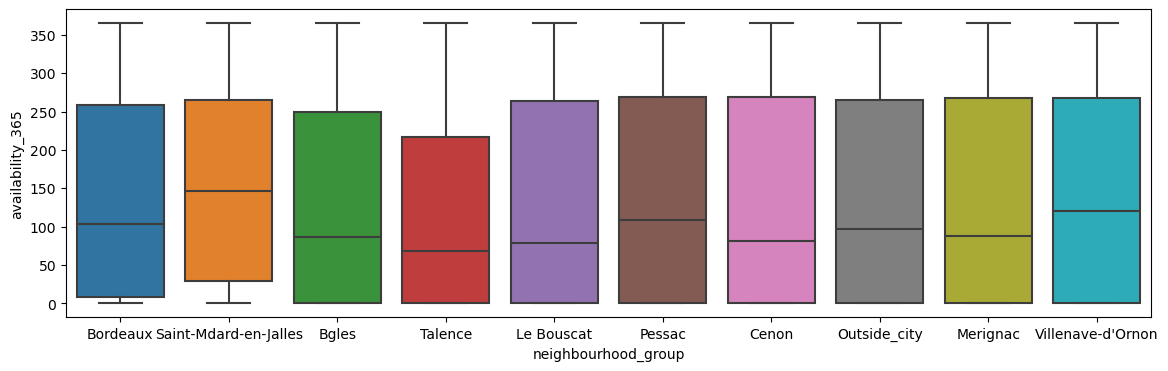

In [233]:
plt.figure(figsize=(14,4))
ax = sns.boxplot(data=bordeaux, x='neighbourhood_group',y='availability_365')

#### Comparison between price and reviews

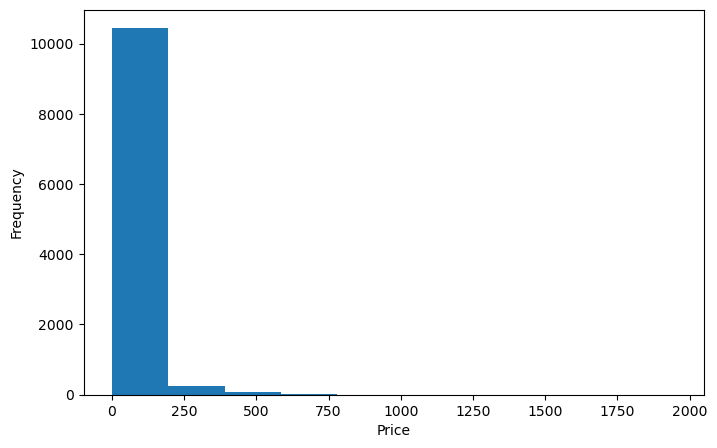

In [50]:
plt.figure(figsize=(8,5))
bordeaux['number_of_reviews'].plot(kind='hist')
plt.xlabel("Price")
plt.show()

We can see that the most number of reviews are in lower prices

## Conclusions

- We can see here that the majority of the properties offered are in the center of Bordeaux, which is the most touristy place, although we also have to take into account that there is a large dispersion of property options outside the city. This is because Bordeaux is a place that attracts many tourists who want to visit wineries that are outside the center. In addition, there are many natural areas to visit, and many beaches, so it can also attract this type of tourism or sports tourism such as surfing.
Regarding the price ratio by area, it is more or less equal, with the highest price being the Le Bouscat area.

- Among the room types offered, the highest option is an entire house or apartment. Then there is a lower proportion for private rooms, and a tiny percentage for shared rooms and hotels. This is because the tourists who arrive prefer to have an entire house, and also depending on the type of areas, this can be offered because there is more dispersion in the type of building and not everything is concentrated in the city. Regarding availability, in shared rooms, availability is greater, since it is the least sought after option. Regarding availability by area, it is more or less equal, with lower availability in Talence.

- Regarding the number of reviews, the lower the price, the more reviews the property will have.